## Getting Ready

**Before we start downloading the data set, we need the Kaggle API token. To get that**

    1) Login into your Kaggle account

    2) Get into your account settings page

    3) Click on Create a new API token
    
    4) This will prompt you to download the .json file into your system. Save the file, and we will use it in the next step.

## Data Pre-processing: parsing url and extracting features

In [1]:
# Config display
import sys
import warnings
import numpy as np
import pandas as pd
from skimpy import skim
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.discovery import all_displays
# from tune_sklearn import TuneGridSearchCV
# from sklearn.tree import export_graphviz

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.width", 500)

# Config sys path
if ('../' not in sys.path):
    sys.path.append('../')
    
# Import library
from fraud import *
from sklearn.model_selection import train_test_split

# Set seed
seed = 1

Skipping, found downloaded files in "../data/raw\dataset-phishing-domain-detection-cybersecurity" (use force=True to force download)
Skipping, found downloaded files in "../data/raw\malicious-urls-dataset" (use force=True to force download)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


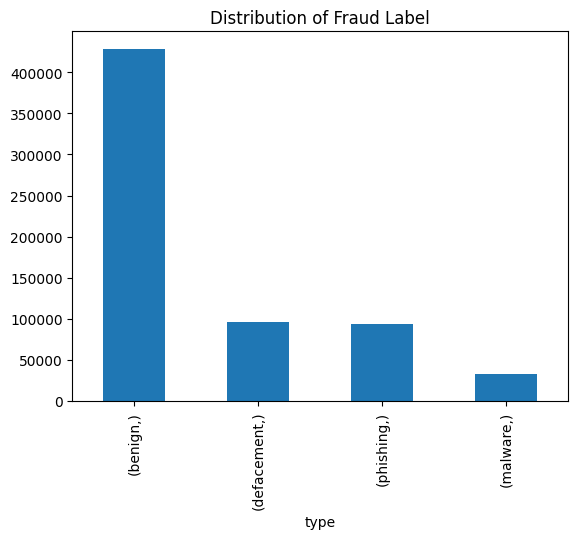

In [2]:
# Download and load dataset 
download_path = "../data/raw"
origin_data = download_and_load(download_path)
new_data = download_and_load_new(download_path)
new_data[['type']].value_counts().plot(kind="bar", title="Distribution of Fraud Label")
new_data.head(5)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign


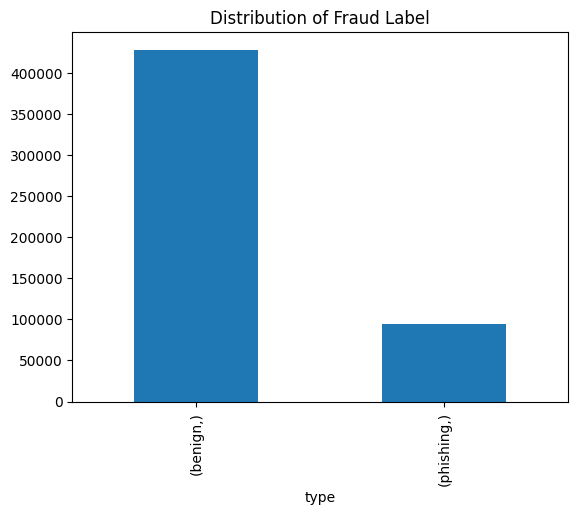

In [3]:
# Take only labels of "benign" as "non-phishing", and "phishing". Filtering out irrelvant values such as "defacement" and "malware"
df_phish = new_data.loc[(new_data['type'] == 'benign') | (new_data['type'] == 'phishing')]
df_phish[['type']].value_counts().plot(kind="bar", title="Distribution of Fraud Label")
df_phish.head(5)

In [4]:
df_phish = process_new_url(df_phish)
df_phish.head(5)

OSError: Cannot save file into a non-existent directory: '..\data\processed\malicious-urls-dataset'

In [ ]:
df_phish.info()
df_phish.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 522214 entries, 0 to 651190
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   url               522214 non-null  object
 1   type              522214 non-null  object
 2   parsed_url        522214 non-null  object
 3   domain            522214 non-null  object
 4   directory         522214 non-null  object
 5   file              522214 non-null  object
 6   params            522214 non-null  object
 7   length_url        522214 non-null  int64 
 8   domain_length     522214 non-null  int64 
 9   directory_length  522214 non-null  int64 
 10  file_length       522214 non-null  int64 
 11  params_length     522214 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 51.8+ MB


,length_url,domain_length,directory_length,file_length,params_length
count,522214.00,522214.00,522214.00,522214.00,522214.00
mean,53.61,17.22,22.94,6.35,7.01
std,41.16,12.24,28.54,13.28,27.98
min,1.00,0.00,0.00,0.00,0.00
25%,30.00,12.00,3.00,0.00,0.00
50%,43.00,15.00,14.00,0.00,0.00
75%,66.00,19.00,32.00,10.00,0.00
max,2175.00,248.00,2140.00,465.00,1611.00


In [ ]:
# reformat df, extracting 86 features such as qty_at_file from the parsed df
# takes <60s
upload_path = "../data/processed"
df_res = reformat_df(df_phish, upload_path)
df_res.head(10)
df_res.info()
df_res.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 522214 entries, 0 to 651190
Columns: 107 entries, url to phishing
dtypes: int64(100), object(7)
memory usage: 430.3+ MB


,length_url,domain_length,directory_length,file_length,params_length,qty_at_url,qty_questionmark_url,qty_underline_url,qty_hyphen_url,qty_equal_url,qty_dot_url,qty_hashtag_url,qty_percent_url,qty_plus_url,qty_dollar_url,qty_exclamation_url,qty_asterisk_url,qty_comma_url,qty_slash_url,qty_space_url,qty_tilde_url,qty_and_url,qty_at_domain,qty_questionmark_domain,qty_underline_domain,qty_hyphen_domain,qty_equal_domain,qty_dot_domain,qty_hashtag_domain,qty_percent_domain,qty_plus_domain,qty_dollar_domain,qty_exclamation_domain,qty_asterisk_domain,qty_comma_domain,qty_slash_domain,qty_space_domain,qty_tilde_domain,qty_and_domain,qty_at_params,qty_questionmark_params,qty_underline_params,qty_hyphen_params,qty_equal_params,qty_dot_params,qty_hashtag_params,qty_percent_params,qty_plus_params,qty_dollar_params,qty_exclamation_params,qty_asterisk_params,qty_comma_params,qty_slash_params,qty_space_params,qty_tilde_params,qty_and_params,qty_at_directory,qty_questionmark_directory,qty_underline_directory,qty_hyphen_directory,qty_equal_directory,qty_dot_directory,qty_hashtag_directory,qty_percent_directory,qty_plus_directory,qty_dollar_directory,qty_exclamation_directory,qty_asterisk_directory,qty_comma_directory,qty_slash_directory,qty_space_directory,qty_tilde_directory,qty_and_directory,qty_at_file,qty_questionmark_file,qty_underline_file,qty_hyphen_file,qty_equal_file,qty_dot_file,qty_hashtag_file,qty_percent_file,qty_plus_file,qty_dollar_file,qty_exclamation_file,qty_asterisk_file,qty_comma_file,qty_slash_file,qty_space_file,qty_tilde_file,qty_and_file,qty_vowels_domain,url_shortened,qty_params,url_google_index,domain_google_index,email_in_url,domain_spf,qty_tld_url,tld_present_params,phishing
count,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00,522214.00
mean,53.61,17.22,22.94,6.35,7.01,0.00,0.17,0.42,1.59,0.30,2.04,0.00,0.45,0.08,0.00,0.00,0.00,0.00,2.72,0.00,0.02,0.14,0.00,0.00,0.00,0.12,0.00,1.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.07,0.08,0.29,0.09,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.09,0.01,0.00,0.13,0.00,0.03,0.24,1.10,0.05,0.14,0.00,0.00,0.06,0.00,0.00,0.00,0.00,1.11,0.01,0.02,0.02,0.00,0.00,0.11,0.31,0.00,0.34,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.47,0.07,0.26,1.00,1.00,0.00,-1.00,0.31,0.99,0.18
std,41.16,12.24,28.54,13.28,27.98,0.06,0.41,1.26,3.09,0.97,1.55,0.04,4.51,0.68,0.03,0.04,0.08,0.11,1.96,0.07,0.13,0.75,0.00,0.00,0.02,0.54,0.00,1.12,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.13,0.48,0.65,0.98,0.70,0.00,0.27,0.37,0.02,0.02,0.03,0.08,0.72,0.23,0.02,0.74,0.04,0.21,1.00,2.71,0.42,0.69,0.10,0.08,0.54,0.01,0.03,0.08,0.10,1.58,0.23,0.13,0.30,0.03,0.00,0.63,1.49,0.11,0.51,0.02,0.02,0.29,0.01,0.01,0.01,0.07,0.00,0.15,0.03,0.10,3.21,0.25,0.79,0.00,0.00,0.00,0.00,0.46,0.10,0.38
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0

In [ ]:
skim(df_res)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 522214 │ │ int32       │ 100   │                                                          │
│ │ Number of columns │ 107    │ │ string      │ 7     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name               ┃ NA  ┃ NA %   ┃ mean      ┃ sd       ┃ p0  ┃ p25  ┃ p50  ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ length_url                │   0 │      0 │        54 │       41 │   1 │   30 │   43 │   66 │ 2200 │   ▇    │  │
│ │ domain_length             │   0 │      0 │        17 │       12 │   0 │   12 │   15 │   19 │  250 │   ▇    │  │
│ │ directory_length          │   0 │      0 │        23 │       29 │   0 │    3 │   14 │   32 │ 2100 │   ▇    │  │
│ │ file_length               │   0 │      0 │       6.3 │       13 │   0 │    0 │    0 │   10 │  460 │   ▇    │  │
│ │ params_length             │   0 │      0 │         7 │       28 │   0 │    0 │    0 │    0 │ 1600 │   ▇    │  │
│ │ qty_at_url                │   0 │      0 │    0.0027 │     0.06 │   0 │    0 │    0 │    0 │   10 │   ▇    │  │
│ │ qty_questionmark_url      │   0 │      0 │      0.17 │     0.41 │   0 │    0 │    0 │    0 │   20 │   ▇    │  │
│ │ qty_underline_url         │   0 │      0 │      0.42 │      1.3 │   0 │    0 │    0 │    0 │   79 │   ▇    │  │
│ │ qty_hyphen_url            │   0 │      0 │       1.6 │      3.1 │   0 │    0 │    0 │    2 │   87 │   ▇    │  │
│ │ qty_equal_url             │   0 │      0 │       0.3 │     0.97 │   0 │    0 │    0 │    0 │   51 │   ▇    │  │
│ │ qty_dot_url               │   0 │      0 │         2 │      1.6 │   0 │    1 │    2 │    2 │   42 │   ▇    │  │
│ │ qty_hashtag_url           │   0 │      0 │    0.0011 │    0.036 │   0 │    0 │    0 │    0 │    6 │   ▇    │  │
│ │ qty_percent_url           │   0 │      0 │      0.45 │      4.5 │   0 │    0 │    0 │    0 │  230 │   ▇    │  │
│ │ qty_plus_url              │   0 │      0 │     0.083 │     0.68 │   0 │    0 │    0 │    0 │   37 │   ▇    │  │
│ │ qty_dollar_url            │   0 │      0 │   0.00029 │    0.026 │   0 │    0 │    0 │    0 │    6 │   ▇    │  │
│ │ qty_exclamation_url       │   0 │      0 │   0.00082 │    0.039 │   0 │    0 │    0 │    0 │    5 │   ▇    │  │
│ │ qty_asterisk_url          │   0 │      0 │   0.00047 │    0.084 │   0 │    0 │    0 │    0 │   54 │   ▇    │  │
│ │ qty_comma_url             │   0 │      0 │    0.0031 │     0.11 │   0 │    0 │    0 │    0 │   15 │   ▇    │  │
│ │ qty_slash_url             │   0 │      0 │       2.7 │        2 │   0 │    1 │    2 │    4 │   41 │   ▇    │  │
│ │ qty_space_url             │   0 │      0 │    0.0008 │    0.075 │   0 │    0 │    0 │    0 │   43 │   ▇    │  │
│ │ qty_tilde_url             │   0 │      0 │     0.017 │     0.13 │   0 │    0 │    0 │    0 │    8 │   ▇    │  │
│ │ qty_and_url               │   0 │      0 │      0.14 │     0.75 │   0 │    0 │    0 │    0 │   50 │   ▇    │  │
│ │ qty_at_domain             │   0 │      0 │   1.1e-05

In [ ]:
# count how many -1 there are for each column
def count_minus_one(df):
    counts = {}
    for col in df.columns:
        # Count the occurrences of -1 in the column
        count_minus_one = (df[col] == -1).sum()
        
        # Store the count in the dictionary
        counts[col] = count_minus_one
    
    return counts


In [ ]:
count_minus_one(df_res)

{'url': 0,
 'type': 0,
 'parsed_url': 0,
 'domain': 0,
 'directory': 0,
 'file': 0,
 'params': 0,
 'length_url': 0,
 'domain_length': 0,
 'directory_length': 0,
 'file_length': 0,
 'params_length': 0,
 'qty_at_url': 0,
 'qty_questionmark_url': 0,
 'qty_underline_url': 0,
 'qty_hyphen_url': 0,
 'qty_equal_url': 0,
 'qty_dot_url': 0,
 'qty_hashtag_url': 0,
 'qty_percent_url': 0,
 'qty_plus_url': 0,
 'qty_dollar_url': 0,
 'qty_exclamation_url': 0,
 'qty_asterisk_url': 0,
 'qty_comma_url': 0,
 'qty_slash_url': 0,
 'qty_space_url': 0,
 'qty_tilde_url': 0,
 'qty_and_url': 0,
 'qty_at_domain': 0,
 'qty_questionmark_domain': 0,
 'qty_underline_domain': 0,
 'qty_hyphen_domain': 0,
 'qty_equal_domain': 0,
 'qty_dot_domain': 0,
 'qty_hashtag_domain': 0,
 'qty_percent_domain': 0,
 'qty_plus_domain': 0,
 'qty_dollar_domain': 0,
 'qty_exclamation_domain': 0,
 'qty_asterisk_domain': 0,
 'qty_comma_domain': 0,
 'qty_slash_domain': 0,
 'qty_space_domain': 0,
 'qty_tilde_domain': 0,
 'qty_and_domain': 0

In [ ]:
#take too long
'''
def count_redirects(url):
    try:
        response = requests.get(url, allow_redirects=True)
        num_redirects = len(response.history)
        return num_redirects
    except requests.exceptions.RequestException:
        # If an exception occurs during the request (e.g., invalid URL), return -1
        return -1

df_res['qty_redirects'] = df_res.loc[:,'url'].apply(count_redirects)
'''

"\ndef count_redirects(url):\n    try:\n        response = requests.get(url, allow_redirects=True)\n        num_redirects = len(response.history)\n        return num_redirects\n    except requests.exceptions.RequestException:\n        # If an exception occurs during the request (e.g., invalid URL), return -1\n        return -1\n\ndf_res['qty_redirects'] = df_res.loc[:,'url'].apply(count_redirects)\n"

In [ ]:
# Check columns present in orginal df but not in df_phish
def complete_test_data(original, new_df):

    # # add columns with unavailable info with -1
    # missing_columns = list(original.columns.difference(new_df.columns))
    # # missing_columns.remove('phishing')
    # for column in missing_columns:
    #     new_df.loc[:,column] = -1

    # remove url, domain, directory, params, file columns
    new_df = new_df.drop(columns=['url','domain','directory','params','file'])
    
    return new_df


In [ ]:
df_final = complete_test_data(origin_data,df_res)
# these are the columns not present within the second dataset, but present within the first dataset
origin_data.columns.difference(df_final.columns)

Index(['asn_ip', 'domain_in_ip', 'qty_ip_resolved', 'qty_mx_servers', 'qty_nameservers', 'qty_redirects', 'server_client_domain', 'time_domain_activation', 'time_domain_expiration', 'time_response', 'tls_ssl_certificate', 'ttl_hostname'], dtype='object')

In [ ]:
skim(df_final)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 522214 │ │ int32       │ 100   │                                                          │
│ │ Number of columns │ 102    │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name               ┃ NA  ┃ NA %   ┃ mean      ┃ sd       ┃ p0  ┃ p25  ┃ p50  ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ length_url                │   0 │      0 │        54 │       41 │   1 │   30 │   43 │   66 │ 2200 │   ▇    │  │
│ │ domain_length             │   0 │      0 │        17 │       12 │   0 │   12 │   15 │   19 │  250 │   ▇    │  │
│ │ directory_length          │   0 │      0 │        23 │       29 │   0 │    3 │   14 │   32 │ 2100 │   ▇    │  │
│ │ file_length               │   0 │      0 │       6.3 │       13 │   0 │    0 │    0 │   10 │  460 │   ▇    │  │
│ │ params_length             │   0 │      0 │         7 │       28 │   0 │    0 │    0 │    0 │ 1600 │   ▇    │  │
│ │ qty_at_url                │   0 │      0 │    0.0027 │     0.06 │   0 │    0 │    0 │    0 │   10 │   ▇    │  │
│ │ qty_questionmark_url      │   0 │      0 │      0.17 │     0.41 │   0 │    0 │    0 │    0 │   20 │   ▇    │  │
│ │ qty_underline_url         │   0 │      0 │      0.42 │      1.3 │   0 │    0 │    0 │    0 │   79 │   ▇    │  │
│ │ qty_hyphen_url            │   0 │      0 │       1.6 │      3.1 │   0 │    0 │    0 │    2 │   87 │   ▇    │  │
│ │ qty_equal_url             │   0 │      0 │       0.3 │     0.97 │   0 │    0 │    0 │    0 │   51 │   ▇    │  │
│ │ qty_dot_url               │   0 │      0 │         2 │      1.6 │   0 │    1 │    2 │    2 │   42 │   ▇    │  │
│ │ qty_hashtag_url           │   0 │      0 │    0.0011 │    0.036 │   0 │    0 │    0 │    0 │    6 │   ▇    │  │
│ │ qty_percent_url           │   0 │      0 │      0.45 │      4.5 │   0 │    0 │    0 │    0 │  230 │   ▇    │  │
│ │ qty_plus_url              │   0 │      0 │     0.083 │     0.68 │   0 │    0 │    0 │    0 │   37 │   ▇    │  │
│ │ qty_dollar_url            │   0 │      0 │   0.00029 │    0.026 │   0 │    0 │    0 │    0 │    6 │   ▇    │  │
│ │ qty_exclamation_url       │   0 │      0 │   0.00082 │    0.039 │   0 │    0 │    0 │    0 │    5 │   ▇    │  │
│ │ qty_asterisk_url          │   0 │      0 │   0.00047 │    0.084 │   0 │    0 │    0 │    0 │   54 │   ▇    │  │
│ │ qty_comma_url             │   0 │      0 │    0.0031 │     0.11 │   0 │    0 │    0 │    0 │   15 │   ▇    │  │
│ │ qty_slash_url             │   0 │      0 │       2.7 │        2 │   0 │    1 │    2 │    4 │   41 │   ▇    │  │
│ │ qty_space_url             │   0 │      0 │    0.0008 │    0.075 │   0 │    0 │    0 │    0 │   43 │   ▇    │  │
│ │ qty_tilde_url             │   0 │      0 │     0.017 │     0.13 │   0 │    0 │    0 │    0 │    8 │   ▇    │  │
│ │ qty_and_url               │   0 │      0 │      0.14 │     0.75 │   0 │    0 │    0 │    0 │   50 │   ▇    │  │
│ │ qty_at_domain             │   0 │      0 │   1.1e-05

In [ ]:
df_final.head(20)

,type,parsed_url,length_url,domain_length,directory_length,file_length,params_length,qty_at_url,qty_questionmark_url,qty_underline_url,qty_hyphen_url,qty_equal_url,qty_dot_url,qty_hashtag_url,qty_percent_url,qty_plus_url,qty_dollar_url,qty_exclamation_url,qty_asterisk_url,qty_comma_url,qty_slash_url,qty_space_url,qty_tilde_url,qty_and_url,qty_at_domain,qty_questionmark_domain,qty_underline_domain,qty_hyphen_domain,qty_equal_domain,qty_dot_domain,qty_hashtag_domain,qty_percent_domain,qty_plus_domain,qty_dollar_domain,qty_exclamation_domain,qty_asterisk_domain,qty_comma_domain,qty_slash_domain,qty_space_domain,qty_tilde_domain,qty_and_domain,qty_at_params,qty_questionmark_params,qty_underline_params,qty_hyphen_params,qty_equal_params,qty_dot_params,qty_hashtag_params,qty_percent_params,qty_plus_params,qty_dollar_params,qty_exclamation_params,qty_asterisk_params,qty_comma_params,qty_slash_params,qty_space_params,qty_tilde_params,qty_and_params,qty_at_directory,qty_questionmark_directory,qty_underline_directory,qty_hyphen_directory,qty_equal_directory,qty_dot_directory,qty_hashtag_directory,qty_percent_directory,qty_plus_directory,qty_dollar_directory,qty_exclamation_directory,qty_asterisk_directory,qty_comma_directory,qty_slash_directory,qty_space_directory,qty_tilde_directory,qty_and_directory,qty_at_file,qty_questionmark_file,qty_underline_file,qty_hyphen_file,qty_equal_file,qty_dot_file,qty_hashtag_file,qty_percent_file,qty_plus_file,qty_dollar_file,qty_exclamation_file,qty_asterisk_file,qty_comma_file,qty_slash_file,qty_space_file,qty_tilde_file,qty_and_file,qty_vowels_domain,url_shortened,qty_params,url_google_index,domain_google_index,email_in_url,domain_spf,qty_tld_url,tld_present_params,phishing
0,phishing,br-icloud.com.br,16,16,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,1,0,-1,1,1,1
1,benign,mp3raid.com/music/krizz_kaliko.html,35,11,5,17,0,0,0,1,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,1,0,-1,1,1,0
2,benign,bopsecrets.org/rexroth/cr/1.htm,31,14,10,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,1,0,-1,1,1,0
5,benign,buzzfil.net/m/show-art/ils-etaient-loin-de-s-i...,111,11,10,88,0,0,0,0,16,0,2,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,15,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,1,0,-1,1,1,0
6,benign,espn.go.com/nba/player/_/id/3457/brandon-rush,45,11,33,0,0,0,0,1,1,0,2,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,1,0,-1,0,1,0
7,benign,yourbittorrent.com/?q=anthony-hamilton-soulife,46,18,0,0,26,0,1,0,2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,1,1,1,0,-1,0,1,0
9,benign,allmusic.com/album/crazy-from-the-heat-r16990,45,12,32,0,0,0,0,0,4,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,1,0,-1,0,1,0
10,benign,corporationwiki.com/Ohio/Columbus/frank-s-bens...,62,19,13,28,0,0,0,0,3,0,2,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,8,0,0,1,1,0,-1,1,1,0
12,benign,myspace.com/video/vid/30602581,30,11,18,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,1,0

In [ ]:
# Lazy prediction
df_final = df_final.drop(columns = ['type', 'parsed_url'])
lazy_predict(df_final, exclude=None)

  5%|▍         | 1/22 [00:43<15:14, 43.53s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9006347960131363, 'Balanced Accuracy': 0.7779274714887756, 'ROC AUC': 0.7779274714887756, 'F1 Score': 0.8941300619608319, 'Time taken': 43.528374910354614}


In [ ]:
# Train test split
from sklearn.model_selection import train_test_split

X = df_final.drop("phishing", axis=1)
y = df_final["phishing"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, stratify=df_final["phishing"])
feat_cols = np.array(X_train.columns)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Default model training
clf = train(RandomForestClassifier(), X_train, y_train)
y_pred = predict(clf, X_test, y_test)

Accuracy: 0.9568472755474278
Recall: 0.8538943789182871


In [ ]:
# def feat_importance(model, feat_cols):
#     '''Rank feature importance among all features.'''
#     # feature_importance = clf.feature_importances_
#     feature_importances = np.mean([
#         tree.feature_importances_ for tree in model.estimators_
#     ], axis=0)
#     sorted_idx = np.argsort(feature_importances)[-20:]
#     fig = plt.figure(figsize=(12, 6))
#     plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
#     plt.yticks(range(len(sorted_idx)), feat_cols[sorted_idx])
#     plt.title("Feature Importance of Classification Model")
#     plt.savefig("../plots/feat_importance.png")
#     plt.show()

feat_cols = np.array(X_train.columns)
feat_importance(clf, feat_cols)

NameError: name 'plt' is not defined

## Final comparison & adjustment with model features

In [ ]:
def feature_check(model, df):
    extra_col = df.columns.difference(model.feature_names_in_)
    if not extra_col.empty:
        df = df.drop(columns=extra_col)
        df = df[model.feature_names_in_]
    return df

In [ ]:
# obtain ttl for hostname of url
# import dns.resolver

# def get_ttl(url):
#     try:
#         result = dns.resolver.resolve(url, 'A')
#         if result.response.answer:
#             return int(result.response.answer[0].ttl)
#     except (dns.resolver.NoAnswer, dns.resolver.NXDOMAIN,
#             dns.exception.Timeout, dns.resolver.NoNameservers):
#         return 0
#     return 0

# df_phish.loc[:,'ttl_hostname'] = df_phish.loc[:,'domain'].apply(lambda i: get_ttl(i))

# import requests
# def check_ssl_certificate(url):
#     try:
#         response = requests.head(url)
#         # Check if the response status code is 200 (OK) or 301 (Moved Permanently)
#         if response.status_code == 200 or response.status_code == 301:
#             return 1  # SSL certificate is available
#     except requests.exceptions.SSLError:
#         pass  # SSL certificate is not available or there is an SSL error
#     except requests.exceptions.RequestException:
#         pass  # Handle other request exceptions if needed
#     return 0  # SSL certificate is not available

# df_phish.loc[:,'tls_ssl_certificate	'] = df_phish.loc[:,'url'].apply(check_ssl_certificate)

### fit trained model

In [ ]:
len(df_final)

522214

In [ ]:
import pickle

with open("../models/model.pkl", "rb") as f:
    model = pickle.load(f)

In [ ]:
# # Load the compressed model
# with bz2.BZ2File('../model/rf_model_0327.pbz2', 'rb') as f:
#     compressed_model = f.read()

# # Decompress and load the model
# model = pickle.loads(compressed_model)

df_to_fit = feature_check(model,df_final)
# Compare predicted results with indicator column
predicted = model.predict(df_to_fit)
indicator_column = df_final['phishing'].values


KeyError: "['domain_in_ip', 'server_client_domain', 'time_response', 'asn_ip', 'time_domain_activation', 'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certificate', 'qty_redirects'] not in index"

In [ ]:
count_minus_one(df_to_fit)

NameError: name 'df_to_fit' is not defined

In [ ]:
# Evaluate prediction performance
# Create confusion matrix
confusion_mat = confusion_matrix(indicator_column, predicted)
# Assuming 'indicator_column' and 'predicted' are defined
accuracy = accuracy_score(indicator_column, predicted)
precision = precision_score(indicator_column, predicted)
print(confusion_mat)
print('accuracy:', accuracy)


[[518295   3919]
 [  5624  88487]]
accuracy: 0.9845162860503792


In [ ]:
confusion_mat_2 = confusion_matrix(indicator_column, predicted)
# Assuming 'indicator_column' and 'predicted' are defined
accuracy_2 = accuracy_score(indicator_column, predicted)
precision_2 = precision_score(indicator_column, predicted)
print(confusion_mat_2)
print('accuracy:', accuracy_2)

[[518295   3919]
 [  5624  88487]]
accuracy: 0.9845162860503792


In [ ]:
# check how many 0s and 1s predicted
np.unique(predicted,return_counts=True)

(array([0, 1], dtype=int64), array([  1898, 614427], dtype=int64))